# Model recovery

This notebook performs model recovery analyses, which tell us how well we're able to determine which model generated the data. This is important for determining the extent to which the models are identifiable and whether we can be confident in the results of our model recovery analyses.

In [1]:
import json
import os

import dill
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from model_fit_tools.model_comparison import calculate_confusion_and_inversion
from model_fit_tools.plotting import *
from model_fit_tools.plotting import plot_matrices
from simulation_based_inference.npe import NPEModel

from transition_uncertainty.beta_models import *
from transition_uncertainty.modelling_utils import (
    load_task_spec,
    repeat_for_all_subjects,
    run_model_recovery,
)
from transition_uncertainty.style import set_style
from transition_uncertainty.utils import check_directories


# Make sure we're in the right directory
check_directories()

set_style("style.mplstyle")

/scratch/users/user/miniconda3/envs/tu_test_39/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Font Heebo already available in Matplotlib.
Matplotlib style set to: style.mplstyle with font Heebo


## Run model recovery

This function runs the entire model-recovery analysis. It generates data from each model, fits each model to the data, and then compares the fits to the true model that generated the data.

> Note: This function can take a long time to run, depending on the number of models and the number of iterations. If available, it is helpful to use a large number of CPU cores to speed up the process.

In [ ]:
# Load task specification
task_spec_path = "data/task_spec"

# Run model recovery
results = run_model_recovery(
    task_spec_path=task_spec_path,
    n_iterations=10,
    trained_model_dir="models",
    n_samples=1000,
    n_subjects=200,
    n_jobs=32,
)

# Get the confusion matrix and inversion matrix
confusion_matrix, inversion_matrix = calculate_confusion_and_inversion(results)

## Plot results

We plot the results using a confusion matrix. This matrix shows the proportion of times each model was selected as the best-fitting model for each dataset.

We can see that for the for the pure model-free and model-based models, the true model is selected as the best-fitting model in all cases. The two combination models get confused, with the `weighting fixed` model being selected as the best-fitting model 100% of the time. However, the distinction between pure model-based/model-free and the combination models is clear.

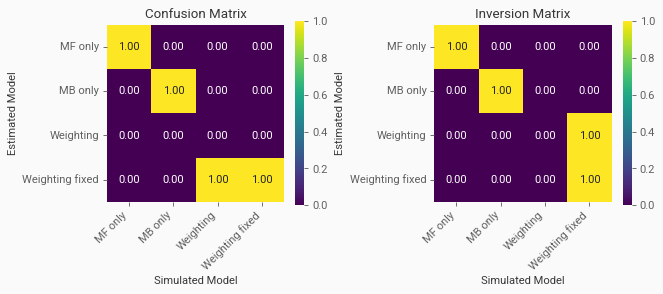

In [3]:
plot_matrices(
    confusion_matrix,
    inversion_matrix,
    results["simulated_model"].unique(),
    scale=0.6,
)